In [1]:
import numpy as np


In [2]:
x_train = np.load('/kaggle/input/gesture-recognition-dataset/train_validation/train_gesture.npy')
y_train = np.load('/kaggle/input/gesture-recognition-dataset/train_validation/train_gesture_labels.npy')

x_val = np.load('/kaggle/input/gesture-recognition-dataset/train_validation/validation_gesture.npy') 
y_val = np.load('/kaggle/input/gesture-recognition-dataset/train_validation/validation_gesture_labels.npy')


In [3]:
print(f"X_train shape: {x_train.shape}, Y_train: {y_train.shape}, X_val shape: {x_val.shape}, Y_val shape: {y_val.shape}")

X_train shape: (18465, 48, 48), Y_train: (18465,), X_val shape: (4600, 48, 48), Y_val shape: (4600,)


In [5]:
from tensorflow.keras.utils import to_categorical

# Normalize the gesture images (if they are pixel data)
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0


# Assuming y_train and y_val are your label arrays
print("Unique classes in training data:", np.unique(y_train))
print("Number of unique classes in training data:", len(np.unique(y_train)))

print("Unique classes in validation data:", np.unique(y_val))
print("Number of unique classes in validation data:", len(np.unique(y_val)))

num_classes = len(np.unique(y_train)) 
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

print(f"Number of classes: {num_classes}")

x_train = np.expand_dims(x_train,axis=-1)
x_val = np.expand_dims(x_val,axis = -1)


Unique classes in training data: [0 1 2 3]
Number of unique classes in training data: 4
Unique classes in validation data: [0 1 2 3]
Number of unique classes in validation data: 4
Number of classes: 4


In [7]:
print(x_train.shape)
print(y_val.shape)

(18465, 48, 48, 1)
(4600, 4)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [11]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape = x_train.shape[1:]),
    MaxPooling2D(pool_size = (2,2)),
    
    Conv2D(64,(3,3), activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(4,activation ='softmax')
])

In [13]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
history = model.fit(x_train, y_train, validation_data = (x_val,y_val),epochs = 50, batch_size=32)

Epoch 1/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8171 - loss: 0.4367 - val_accuracy: 0.6783 - val_loss: 0.9845
Epoch 2/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8299 - loss: 0.4111 - val_accuracy: 0.6717 - val_loss: 1.0449
Epoch 3/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8291 - loss: 0.4107 - val_accuracy: 0.6796 - val_loss: 1.0890
Epoch 4/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8331 - loss: 0.3914 - val_accuracy: 0.6717 - val_loss: 1.1691
Epoch 5/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8400 - loss: 0.3791 - val_accuracy: 0.6800 - val_loss: 1.0929
Epoch 6/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8470 - loss: 0.3587 - val_accuracy: 0.6811 - val_loss: 1.1814
Epoch 7/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8471 - loss: 0.3550 - val_accuracy: 0.6739 - val_loss: 1.1527
Epoch 8/50
578/578 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8543 - loss: 0.3434 - val_accuracy: 0.

In [25]:
test_image = 3
test_gesture = x_val[test_image]
test_label = np.argmax(y_val[test_image])

test_gesture_expanded = np.expand_dims(test_gesture, axis=0)

predicted_probabilities = model.predict(test_gesture_expanded)
predicted_label = np.argmax(predicted_probabilities)

print(f'Actual Label:{test_label} , Predicted Label:{predicted_label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Actual Label:0 , Predicted Label:0


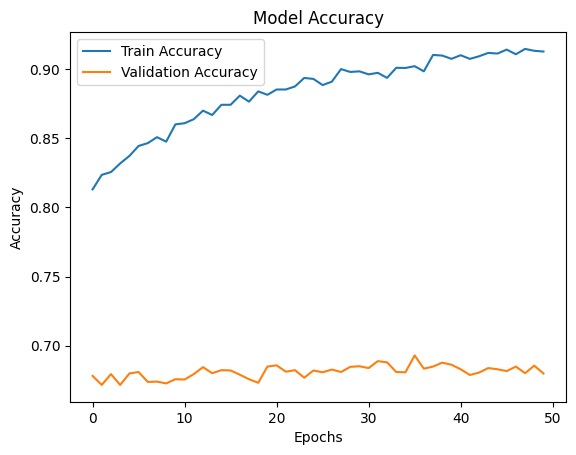

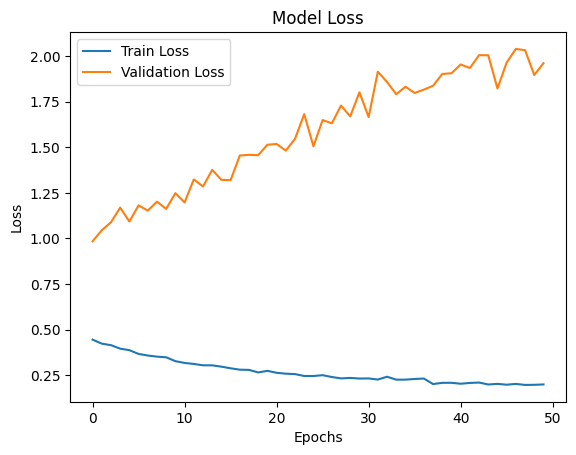

In [26]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()